In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('StudentsPerformance.csv') 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [4]:
df.describe()

,mathscore,readingscore,writingscore
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
db = df.drop(['test preparation course','lunch'], axis=1, inplace=False)
db.head()

,gender,race/ethnicity,parental level of education,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75


In [6]:
df['race/ethnicity'] = df['race/ethnicity'].map({
    'group A': 'Asian Students',
    'group B': 'African Students',
    'group C': 'Afro-Asian Students',
    'group D': 'American Students',
    'group E': 'European Students'
})
print(df.head(5))

   gender       race/ethnicity parental level of education         lunch  \
0  female     African Students           bachelor's degree      standard   
1  female  Afro-Asian Students                         NaN      standard   
2  female     African Students             master's degree      standard   
3    male       Asian Students          associate's degree  free/reduced   
4    male  Afro-Asian Students                         NaN      standard   

  test preparation course  mathscore  readingscore  writingscore  
0                    none         72            72            74  
1               completed         69            90            88  
2                    none         90            95            93  
3                    none         47            57            44  
4                    none         76            78            75  


[Text(0.5, 1.0, 'Gender Based Visualization based on Test'),
 Text(0.5, 0, 'race'),
 Text(0, 0.5, 'Total')]

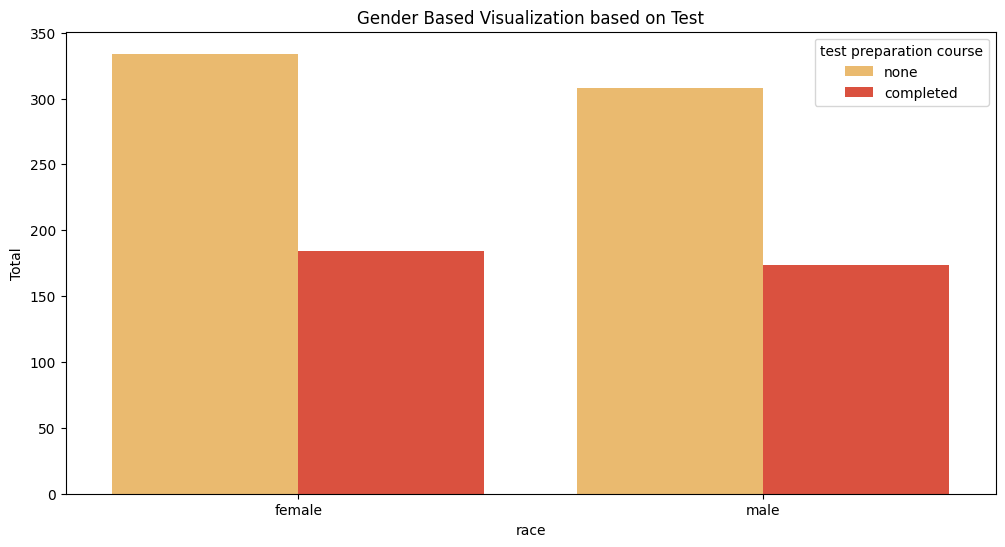

In [14]:
plt.figure(figsize = [12,6])
ax = sns.countplot(x = 'gender', hue = 'test preparation course',data = df , palette='YlOrRd') 
ax.set(title = 'Gender Based Visualization based on Test',
xlabel = 'race', ylabel = 'Total')

[Text(0.5, 1.0, 'Gender Based Visualization of Student Group'),
 Text(0.5, 0, 'race'),
 Text(0, 0.5, 'Total')]

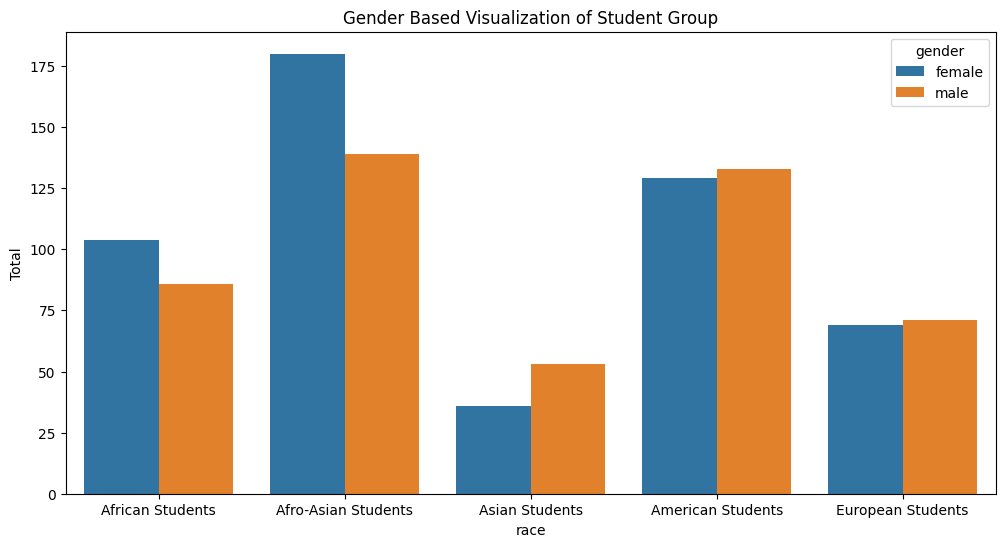

In [7]:
plt.figure(figsize = [12,6])
ax = sns.countplot(x = 'race/ethnicity', hue = 'gender',data = df) 
ax.set(title = 'Gender Based Visualization of Student Group',
xlabel = 'race', ylabel = 'Total')

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Total'),
 Text(0.5, 1.0, 'Number of Students on the basis of marks obtained')]

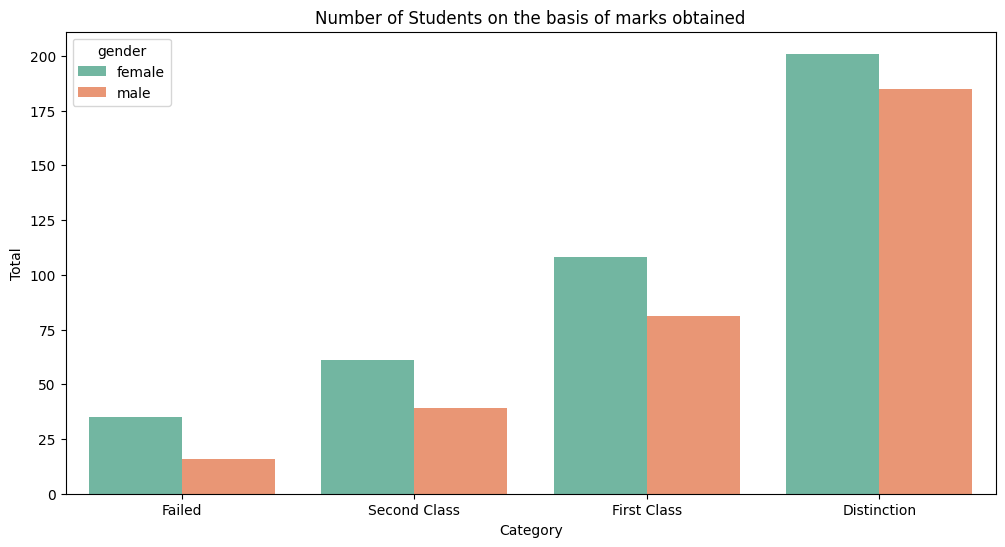

In [10]:
plt.figure(figsize = [12,6])
interval = (0,40,50,60,75)
categories = ['Failed','Second Class','First Class', 'Distinction']
df['marks_plot'] = pd.cut(df.mathscore, interval, labels = categories)
ax = sns.countplot(x = 'marks_plot', data = df, hue = 'gender', palette = 'Set2')
ax.set(xlabel='Category', ylabel='Total',
title="Number of Students on the basis of marks obtained")